<a href="https://colab.research.google.com/github/OWLYone/ITGRA2022_AIREPOS/blob/main/MS_TM_FindFaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Find Faces TM
Marek A. Sowa v1


---



In [ ]:
!pip install opencv-python
!apt update && apt install -y libsm6 libxext6
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import urllib2
import numpy as np

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Hit:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:13 https://developer.download.nv

Initialise model with faces

In [ ]:
xmldata = urllib2.urlopen('https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml').read()
file = open('haarcascade_frontalface.xml','w')
file.write(xmldata)
file.close()

In [ ]:
def findfaces(fullurltoimage):
  f = urllib2.urlopen(fullurltoimage)
  face_cascade = cv2.CascadeClassifier('haarcascade_frontalface.xml')
  image = np.asarray(bytearray(f.read()), dtype="uint8")
  image = cv2.imdecode(image, cv2.IMREAD_COLOR)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(
      gray,
      scaleFactor=1.1,
      minNeighbors=5,
      minSize=(30, 30),
      flags = cv2.CASCADE_SCALE_IMAGE
  )
  print "------> Found {0} - this is an ID document <------ ".format(len(faces))

  for (x, y, w, h) in faces:
      cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 5)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.imshow(image,extent=[300,500,0,1],aspect='auto')
  plt.grid(False)
  plt.axis('off')
  plt.show()

# Find a face without API

In [ ]:
#@title Find a face!
url = 'https://transporten.files.wordpress.com/2015/03/polsk3.jpg?w=978' #@param {type:"string"}

------> Found 2 - this is an ID document <------ 


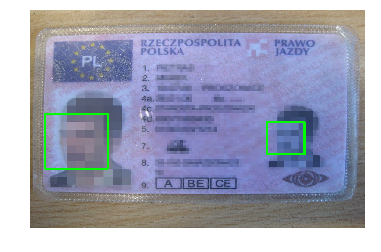

In [ ]:
findfaces(url)